<a href="https://colab.research.google.com/github/Anqi-Wang-aug/3307-individual-assignment/blob/main/monkeypox_prediction(2022).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 104 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.9 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638631 sha256=3ef4afd2b0faf93eb2ed45acb28f399d426c79265a603954d317dea5754f37aa
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.7
    Uninstalling cmdstanpy-1.0.7:
      Successfully uninstalled cmdstanpy-1.0.7
ERROR: pip's dependency resolver does not currently take into account all the 

In [ ]:
from pandas import read_csv
path = "/content/drive/MyDrive/U.S. Monkeypox Case Trends Reported to CDC - U.S. Monkeypox Case Trends Reported to CDC.csv"
df = read_csv(path)
df = df.drop(columns =['Cases'])

#df = df.drop(columns=['Total'])

In [ ]:
df.to_csv('/content/drive/MyDrive/monkeypox_table/total.csv')

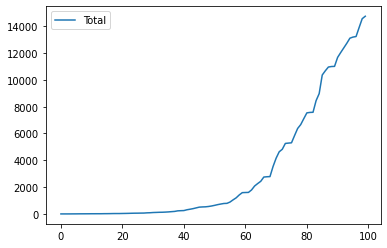

In [ ]:
from matplotlib import pyplot
df.plot()
#pyplot.show()
pyplot.savefig('/content/drive/MyDrive/monkeypox_pics/total.png')

In [ ]:
df

,Epi-date,Total
0,5/17/2022,1
1,5/18/2022,1
2,5/19/2022,1
3,5/20/2022,2
4,5/21/2022,4
...,...,...
95,8/20/2022,13192
96,8/21/2022,13232
97,8/22/2022,13908
98,8/23/2022,14564


In [ ]:
from fbprophet import Prophet
from pandas import to_datetime
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])


# List of holidays in the US from May 17th to August 31st
 Obtained from [US holiday -- timeanddate](https://www.timeanddate.com/holidays/us/)
## May
1. 2022-05-20: National Defense Transportation Day
3. 2022-05-21: Public Lands day, Armed Forces Day, Preakness Stakes
4. 2022-05-22: Harvey Milk Day
5. 2022-05-25: Emergency Medical Services for Children Day, National Missing Children's Day
7. 2022-05-30: Memorial Day, Decoration Day, Jefferson Davis' Birthday

## June
1. 2022-06-01: First Day of Pride Month, First Day of Caribbean-American Heritage Month, Statehood Day
2. 2022-06-03: Jefferson Davis' Birthday
3. 2022-06-05: Pentecost, Shavuot, Native American Day
4. 2022-06-06: Whit Monday, Jefferson Davis' Birthday, D-Day
5. 2022-06-10: Kamehameha Day
6. 2022-06-11: Belmont Stakes
7. 2022-06-12: Trinity Sunday, Loving Day
8. 2022-06-14: Army Birthday, Flag Day
10. 2022-06-17: Bunker Hill Day, Juneteenth
11. 2022-06-18: Juneteenth Day
12. 2022-06-19: Father's day, Juneteenth, Juneteenth National Freedom Day, Juneteenth Independence Day, Emancipation Day
13. 2022-06-20: Juneteenth (substitute), West Virginia Day, American Eagle Day
14. 2022-06-28: Carolina Day

## July
1. 2022-07-04: Independence Day
3. 2022-07-13: Nathan Bedford Forrest Day
4. 2022-07-14: Bastille Day
5. 2022-07-16: Rural Rransit Day
6. 2022-07-24: Pioneer Day, Parents' Day
7. 2022-07-25: Pioneer Day observed
8. 2022-07-27: National Korean War Veterans Armistice Day

## August
1. 2022-08-01: Colorado Day
2. 2022-08-04: Coast Guard Birthday, Barack Obama Day
3. 2022-08-07: Tisha B'Av, American Family Day, Purple Heart Day
4. 2022-08-08: Victory Day
6. 2022-08-14: 	National Navajo Code Talkers Day
8. 2022-08-16: Bennington Battle Day
9. 2022-08-19: Hawaii Statehood Day, National Aviation Day
10. 2022-08-21: National Senior Citizens Day
11. 2022-08-26: Susan B. Anthony Day, Women's Equality Day
12. 2022-08-27: Lyndon Baines Johnson Day

In [ ]:
import pandas
holidays = pandas.DataFrame({
  'holiday': 'playoff',
  'ds': pandas.to_datetime(['2022-05-20', '2022-05-21', '2022-05-22', '2022-05-25', '2022-05-30', 
                        '2022-06-01', '2022-06-03', '2022-06-05', '2022-06-06', '2022-06-10', '2022-06-11', '2022-06-12', '2022-06-14', '2022-06-17', '2022-06-18', '2022-06-19', '2022-06-20', '2022-06-28',
                        '2022-07-04', '2022-07-13', '2022-07-14', '2022-07-16', '2022-07-24', '2022-07-25', '2022-07-27',
                        '2022-08-01', '2022-08-04', '2022-08-07', '2022-08-08', '2022-08-14', '2022-08-16', '2022-08-19', '2022-08-21', '2022-08-26', '2022-08-27']),
  'lower_window': 0,
  'upper_window': 1,
})

In [ ]:
import math
train = df[df['ds']<='2022-07-31']
#train = train[train['ds']>='2022-05-20']
l = int(train.size/2)-1
y3 = train.loc[l]['y']
y2 = train.loc[l-1]['y']
y1 = train.loc[l-2]['y']
k = (math.sqrt(y2)*(y1+y3)-2*y1*y2*y3)/(math.sqrt(y2)-y1*y3)
k = round(k,3)
print(k)
train['cap'] = k

tmodel = Prophet(growth='logistic', holidays = holidays)
tmodel.fit(train)


10568.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# Forecast: Aug 01-10
using data: before Aug

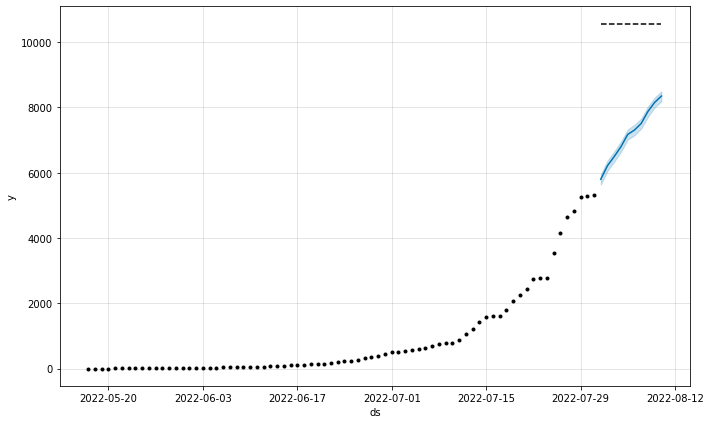

In [ ]:
# prophet forecast
from pandas import DataFrame
#from prophet.plot import add_changepoints_to_plot
tfuture = list()
for i in range(1,11):
  date = '2022-08-%02d' %i
  tfuture.append([date])
tfuture = DataFrame(tfuture)
tfuture.columns = ['ds']
tfuture['ds'] = to_datetime(tfuture['ds'])
tfuture['cap'] = k
tforecast = tmodel.predict(tfuture)
fig = tmodel.plot(tforecast)
#a = add_changepoints_to_plot(fig.gca(), tmodel, tforecast)
#pyplot.show()
pyplot.savefig('/content/drive/MyDrive/monkeypox_pics/forecast01.png')

In [ ]:
tforecast

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,...,playoff,playoff_lower,playoff_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-08-01,5827.709570,10568.0,5634.379920,5945.029385,5827.709570,5827.709570,-27.880601,-27.880601,-27.880601,...,13.308448,13.308448,13.308448,-41.189049,-41.189049,-41.189049,0.0,0.0,0.0,5799.828969
1,2022-08-02,6143.368976,10568.0,6058.649403,6371.604972,6143.368974,6143.368977,72.671161,72.671161,72.671161,...,60.861835,60.861835,60.861835,11.809326,11.809326,11.809326,0.0,0.0,0.0,6216.040137
2,2022-08-03,6452.851338,10568.0,6337.806076,6654.480940,6452.851335,6452.851340,43.663492,43.663492,43.663492,...,0.000000,0.000000,0.000000,43.663492,43.663492,43.663492,0.0,0.0,0.0,6496.514830
3,2022-08-04,6754.125464,10568.0,6642.236657,6956.114892,6754.125460,6754.125468,44.058924,44.058924,44.058924,...,13.308448,13.308448,13.308448,30.750476,30.750476,30.750476,0.0,0.0,0.0,6798.184388
4,2022-08-05,7045.383714,10568.0,7019.552554,7325.825661,7045.383708,7045.383720,127.811258,127.811258,127.811258,...,60.861835,60.861835,60.861835,66.949423,66.949423,66.949423,0.0,0.0,0.0,7173.194972
5,2022-08-06,7325.078791,10568.0,7145.052045,7470.635894,7325.078783,7325.078799,-16.965359,-16.965359,-16.965359,...,0.000000,0.000000,0.000000,-16.965359,-16.965359,-16.965359,0.0,0.0,0.0,7308.113432
6,2022-08-07,7591.946941,10568.0,7353.847008,7662.963183,7591.946930,7591.946950,-81.709862,-81.709862,-81.709862,...,13.308448,13.308448,13.308448,-95.018309,-95.018309,-95.018309,0.0,0.0,0.0,7510.237079
7,2022-08-08,7845.017587,10568.0,7713.298663,8032.356905,7845.017575,7845.017598,32.981234,32.981234,32.981234,...,74.170283,74.170283,74.170283,-41.189049,-41.189049,-41.189049,0.0,0.0,0.0,7877.998821
8,2022-08-09,8083.610420,10568.0,8002.978629,8303.956039,8083.610407,8083.610433,72.671161,72.671161,72.671161,...,60.861835,60.861835,60.861835,11.809326,11.809326,11.809326,0.0,0.0,0.0,8156.281581
9,2022-08-10,8307.321715,10568.0,8185.082792,8497.191339,8307.321700,8307.321729,43.663492,43.663492,43.663492,...,0.000000,0.000000,0.000000,43.663492,43.663492,43.663492,0.0,0.0,0.0,8350.985207


In [ ]:
tforecast.to_csv('/content/drive/MyDrive/monkeypox_table/tforecast01.csv')

(10,)
(10,)
MAE: 478.462
MAPE: 0.055


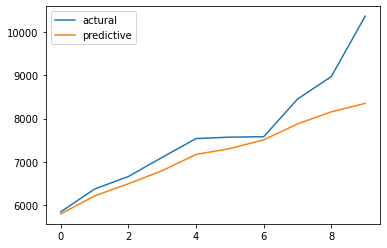

In [ ]:
# prophet forecast evaluation
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
actural = df[df['ds']>'2022-07-31']
actural = actural[actural['ds']<='2022-08-10']
actural = actural['y'].values
pred = tforecast['yhat'].values
print(actural.shape)
print(pred.shape)
mae = mean_absolute_error(actural, pred)
mape = mean_absolute_percentage_error(actural, pred)
print('MAE: %.3f' % mae)
print('MAPE: %.3f' % mape)
pyplot.plot(actural, label = 'actural')
pyplot.plot(pred, label = 'predictive')
pyplot.legend()
pyplot.savefig('/content/drive/MyDrive/monkeypox_pics/accuracy01.png')

In [ ]:
error = actural-pred
error_per_day = DataFrame()
error_per_day.insert(0,'Date', tfuture['ds'])
error_per_day.insert(1, 'Actural', actural)
error_per_day.insert(2, 'Pred', pred)
error_per_day.insert(3, 'Error', error)
error_per_day

,Date,Actural,Pred,Error
0,2022-08-01,5848,5799.828969,48.171031
1,2022-08-02,6375,6216.040137,158.959863
2,2022-08-03,6664,6496.514830,167.485170
3,2022-08-04,7107,6798.184388,308.815612
4,2022-08-05,7539,7173.194972,365.805028
5,2022-08-06,7572,7308.113432,263.886568
6,2022-08-07,7582,7510.237079,71.762921
7,2022-08-08,8450,7877.998821,572.001179
8,2022-08-09,8972,8156.281581,815.718419
9,2022-08-10,10363,8350.985207,2012.014793


In [ ]:
error_per_day.to_csv('/content/drive/MyDrive/monkeypox_table/err01.csv')

# Forecast: Aug 01-Aug 17
Using data: before Aug


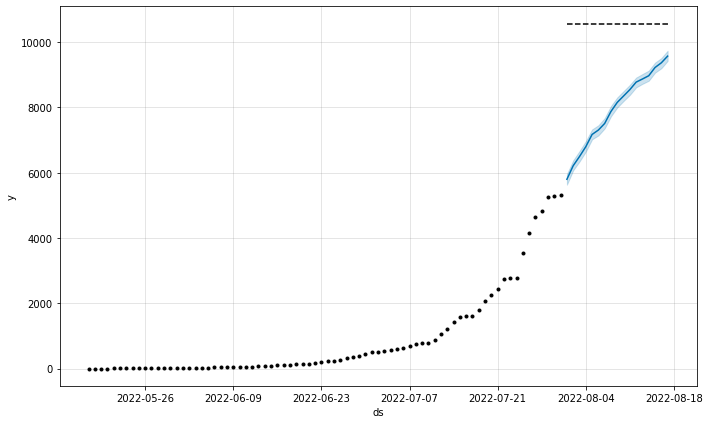

In [ ]:
# prophet forecast
from pandas import DataFrame
#from prophet.plot import add_changepoints_to_plot
tfuture = list()
for i in range(1,18):
  date = '2022-08-%02d' %i
  tfuture.append([date])
tfuture = DataFrame(tfuture)
tfuture.columns = ['ds']
tfuture['ds'] = to_datetime(tfuture['ds'])
tfuture['cap'] = k
tforecast = tmodel.predict(tfuture)
fig = tmodel.plot(tforecast)
#a = add_changepoints_to_plot(fig.gca(), tmodel, tforecast)
#pyplot.show()
pyplot.savefig('/content/drive/MyDrive/monkeypox_pics/forecast03.png')

In [ ]:
tforecast

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,...,playoff,playoff_lower,playoff_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-08-01,5827.709570,10568.0,5633.689585,5958.320115,5827.709570,5827.709571,-27.880601,-27.880601,-27.880601,...,13.308448,13.308448,13.308448,-41.189049,-41.189049,-41.189049,0.0,0.0,0.0,5799.828969
1,2022-08-02,6143.368976,10568.0,6076.242823,6380.351868,6143.368975,6143.368977,72.671161,72.671161,72.671161,...,60.861835,60.861835,60.861835,11.809326,11.809326,11.809326,0.0,0.0,0.0,6216.040137
2,2022-08-03,6452.851338,10568.0,6344.119981,6663.927072,6452.851335,6452.851341,43.663492,43.663492,43.663492,...,0.000000,0.000000,0.000000,43.663492,43.663492,43.663492,0.0,0.0,0.0,6496.514830
3,2022-08-04,6754.125464,10568.0,6644.549976,6966.706612,6754.125460,6754.125469,44.058924,44.058924,44.058924,...,13.308448,13.308448,13.308448,30.750476,30.750476,30.750476,0.0,0.0,0.0,6798.184388
4,2022-08-05,7045.383714,10568.0,7024.664890,7327.786340,7045.383709,7045.383721,127.811258,127.811258,127.811258,...,60.861835,60.861835,60.861835,66.949423,66.949423,66.949423,0.0,0.0,0.0,7173.194972
5,2022-08-06,7325.078791,10568.0,7142.319477,7454.463461,7325.078783,7325.078800,-16.965359,-16.965359,-16.965359,...,0.000000,0.000000,0.000000,-16.965359,-16.965359,-16.965359,0.0,0.0,0.0,7308.113432
6,2022-08-07,7591.946941,10568.0,7358.424851,7673.449726,7591.946931,7591.946951,-81.709862,-81.709862,-81.709862,...,13.308448,13.308448,13.308448,-95.018309,-95.018309,-95.018309,0.0,0.0,0.0,7510.237079
7,2022-08-08,7845.017587,10568.0,7730.092370,8045.418744,7845.017575,7845.017599,32.981234,32.981234,32.981234,...,74.170283,74.170283,74.170283,-41.189049,-41.189049,-41.189049,0.0,0.0,0.0,7877.998821
8,2022-08-09,8083.610420,10568.0,8000.149936,8308.610451,8083.610407,8083.610434,72.671161,72.671161,72.671161,...,60.861835,60.861835,60.861835,11.809326,11.809326,11.809326,0.0,0.0,0.0,8156.281581
9,2022-08-10,8307.321715,10568.0,8197.845217,8500.923370,8307.321700,8307.321730,43.663492,43.663492,43.663492,...,0.000000,0.000000,0.000000,43.663492,43.663492,43.663492,0.0,0.0,0.0,8350.985207


In [ ]:
tforecast.to_csv('/content/drive/MyDrive/monkeypox_table/tforecast02.csv')

(17,)
(17,)
MAE: 1246.196
MAPE: 0.117


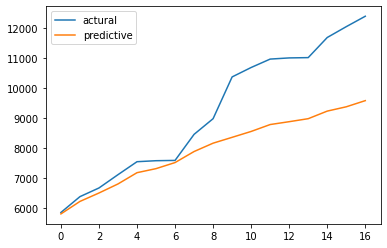

In [ ]:
# prophet forecast evaluation
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
actural = df[df['ds']>'2022-07-31']
actural = actural[actural['ds']<'2022-08-18']
actural = actural['y'].values
pred = tforecast['yhat'].values
print(actural.shape)
print(pred.shape)
mae = mean_absolute_error(actural, pred)
mape = mean_absolute_percentage_error(actural, pred)
print('MAE: %.3f' % mae)
print('MAPE: %.3f' % mape)
pyplot.plot(actural, label = 'actural')
pyplot.plot(pred, label = 'predictive')
pyplot.legend()
pyplot.savefig('/content/drive/MyDrive/monkeypox_pics/accuracy03.png')

In [ ]:
error = actural-pred
error_per_day = DataFrame()
error_per_day.insert(0,'Date', tfuture['ds'])
error_per_day.insert(1, 'Actural', actural)
error_per_day.insert(2, 'Pred', pred)
error_per_day.insert(3, 'Error', error)
error_per_day

,Date,Actural,Pred,Error
0,2022-08-01,5848,5799.828969,48.171031
1,2022-08-02,6375,6216.040137,158.959863
2,2022-08-03,6664,6496.514830,167.485170
3,2022-08-04,7107,6798.184388,308.815612
4,2022-08-05,7539,7173.194972,365.805028
5,2022-08-06,7572,7308.113432,263.886568
6,2022-08-07,7582,7510.237079,71.762921
7,2022-08-08,8450,7877.998821,572.001179
8,2022-08-09,8972,8156.281581,815.718419
9,2022-08-10,10363,8350.985207,2012.014793


In [ ]:
error_per_day.to_csv('/content/drive/MyDrive/monkeypox_table/err02.csv')

# Forecast: Aug 11-17
Using data: May 17--Aug 10

In [ ]:
train = df[df['ds']<='2022-08-10']
#train = train[train['ds']>='2022-05-20']
l = int(train.size/2)-1
y3 = train.loc[l]['y']
y2 = train.loc[l-1]['y']
y1 = train.loc[l-2]['y']
k = (math.sqrt(y2)*(y1+y3)-2*y1*y2*y3)/(math.sqrt(y2)-y1*y3)
k = round(k,3)
print(k)
train['cap'] = k

tmodel = Prophet(growth='logistic', holidays = holidays)
tmodel.fit(train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


17943.999


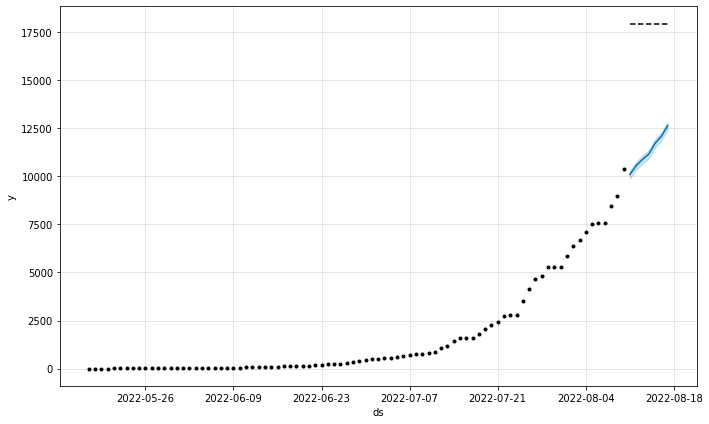

In [ ]:
# prophet forecast
from pandas import DataFrame
#from prophet.plot import add_changepoints_to_plot
tfuture = list()
for i in range(11,18):
  date = '2022-08-%02d' %i
  tfuture.append([date])
tfuture = DataFrame(tfuture)
tfuture.columns = ['ds']
tfuture['ds'] = to_datetime(tfuture['ds'])
tfuture['cap'] = k
tforecast = tmodel.predict(tfuture)
fig = tmodel.plot(tforecast)
#a = add_changepoints_to_plot(fig.gca(), tmodel, tforecast)
#pyplot.show()
pyplot.savefig('/content/drive/MyDrive/monkeypox_pics/forecast04.png')

In [ ]:
tforecast

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,...,playoff,playoff_lower,playoff_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-08-11,10059.348321,17943.999,9883.409519,10299.019628,10059.348321,10059.348321,35.948863,35.948863,35.948863,...,0.000000,0.000000,0.000000,35.948863,35.948863,35.948863,0.0,0.0,0.0,10095.297185
1,2022-08-12,10486.892727,17943.999,10344.804741,10758.915384,10486.892726,10486.892727,70.563582,70.563582,70.563582,...,0.000000,0.000000,0.000000,70.563582,70.563582,70.563582,0.0,0.0,0.0,10557.456309
2,2022-08-13,10907.470507,17943.999,10665.171380,11086.535101,10907.470506,10907.470508,-31.284796,-31.284796,-31.284796,...,0.000000,0.000000,0.000000,-31.284796,-31.284796,-31.284796,0.0,0.0,0.0,10876.185711
3,2022-08-14,11319.312322,17943.999,10931.669168,11360.871124,11319.312320,11319.312323,-164.542507,-164.542507,-164.542507,...,-31.253805,-31.253805,-31.253805,-133.288702,-133.288702,-133.288702,0.0,0.0,0.0,11154.769815
4,2022-08-15,11720.802223,17943.999,11511.804929,11932.158848,11720.802220,11720.802225,-4.069301,-4.069301,-4.069301,...,40.697216,40.697216,40.697216,-44.766517,-44.766517,-44.766517,0.0,0.0,0.0,11716.732922
5,2022-08-16,12110.499651,17943.999,11867.453833,12288.638656,12110.499648,12110.499654,-30.654605,-30.654605,-30.654605,...,-31.253805,-31.253805,-31.253805,0.599199,0.599199,0.599199,0.0,0.0,0.0,12079.845046
6,2022-08-17,12487.155413,17943.999,12434.606391,12834.179796,12487.155409,12487.155417,142.925586,142.925586,142.925586,...,40.697216,40.697216,40.697216,102.228370,102.228370,102.228370,0.0,0.0,0.0,12630.081000


In [ ]:
tforecast.to_csv('/content/drive/MyDrive/monkeypox_table/forecast03.csv')

(7,)
(7,)
MAE: 225.641
MAPE: 0.020


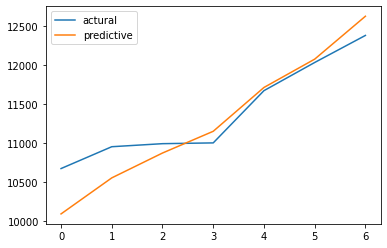

In [ ]:
tforecast# prophet forecast evaluation
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
actural = df[df['ds']>'2022-08-10']
actural = actural[actural['ds']<'2022-08-18']
actural = actural['y'].values
pred = tforecast['yhat'].values
print(actural.shape)
print(pred.shape)
mae = mean_absolute_error(actural, pred)
mape = mean_absolute_percentage_error(actural, pred)
print('MAE: %.3f' % mae)
print('MAPE: %.3f' % mape)
pyplot.plot(actural, label = 'actural')
pyplot.plot(pred, label = 'predictive')
pyplot.legend()
pyplot.savefig('/content/drive/MyDrive/monkeypox_pics/accuracy04.png')

In [ ]:
error = actural-pred
error_per_day = DataFrame()
error_per_day.insert(0,'Date', tfuture['ds'])
error_per_day.insert(1, 'Actural', actural)
error_per_day.insert(2, 'Pred', pred)
error_per_day.insert(3, 'Error', error)
error_per_day

,Date,Actural,Pred,Error
0,2022-08-11,10677,10095.297185,581.702815
1,2022-08-12,10957,10557.456309,399.543691
2,2022-08-13,10996,10876.185711,119.814289
3,2022-08-14,11006,11154.769815,-148.769815
4,2022-08-15,11676,11716.732922,-40.732922
5,2022-08-16,12037,12079.845046,-42.845046
6,2022-08-17,12384,12630.081000,-246.081000


In [ ]:
error_per_day.to_csv('/content/drive/MyDrive/monkeypox_table/err03.csv')

# Forecast: Aug 11-Aug 24
using data before Aug 10

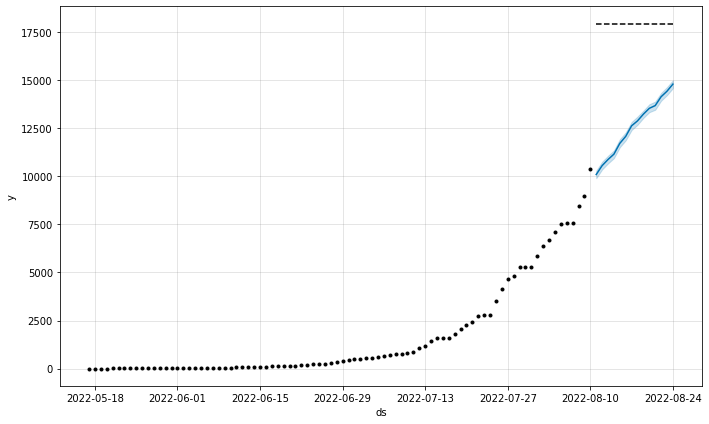

In [ ]:
# prophet forecast
from pandas import DataFrame
#from prophet.plot import add_changepoints_to_plot
tfuture = list()
for i in range(11,25):
  date = '2022-08-%02d' %i
  tfuture.append([date])
tfuture = DataFrame(tfuture)
tfuture.columns = ['ds']
tfuture['ds'] = to_datetime(tfuture['ds'])
tfuture['cap'] = k
tforecast = tmodel.predict(tfuture)
fig = tmodel.plot(tforecast)
#a = add_changepoints_to_plot(fig.gca(), tmodel, tforecast)
#pyplot.show()
pyplot.savefig('/content/drive/MyDrive/monkeypox_pics/forecast05.png')

(14,)
(14,)
MAE: 219.606
MAPE: 0.018


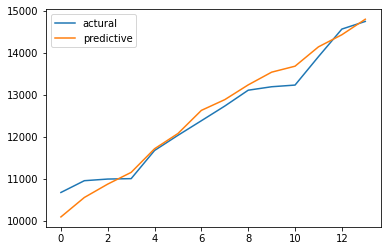

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
actural = df[df['ds']>'2022-08-10']
actural = actural[actural['ds']<'2022-08-25']
actural = actural['y'].values
pred = tforecast['yhat'].values
print(actural.shape)
print(pred.shape)
mae = mean_absolute_error(actural, pred)
mape = mean_absolute_percentage_error(actural, pred)
print('MAE: %.3f' % mae)
print('MAPE: %.3f' % mape)
pyplot.plot(actural, label = 'actural')
pyplot.plot(pred, label = 'predictive')
pyplot.legend()
pyplot.savefig('/content/drive/MyDrive/monkeypox_pics/accuracy05.png')

In [ ]:
tforecast.to_csv('/content/drive/MyDrive/monkeypox_table/forecast04.csv')

In [ ]:
error = actural-pred
error_per_day = DataFrame()
error_per_day.insert(0,'Date', tfuture['ds'])
error_per_day.insert(1, 'Actural', actural)
error_per_day.insert(2, 'Pred', pred)
error_per_day.insert(3, 'Error', error)
error_per_day

,Date,Actural,Pred,Error
0,2022-08-11,10677,10095.297185,581.702815
1,2022-08-12,10957,10557.456309,399.543691
2,2022-08-13,10996,10876.185711,119.814289
3,2022-08-14,11006,11154.769815,-148.769815
4,2022-08-15,11676,11716.732922,-40.732922
5,2022-08-16,12037,12079.845046,-42.845046
6,2022-08-17,12384,12630.081000,-246.081000
7,2022-08-18,12733,12885.670351,-152.670351
8,2022-08-19,13110,13236.664620,-126.664620
9,2022-08-20,13192,13538.828102,-346.828102


In [ ]:
error_per_day.to_csv('/content/drive/MyDrive/monkeypox_table/err04.csv')

In [ ]:
train

,ds,y,cap
0,2022-05-17,1,17943.999
1,2022-05-18,1,17943.999
2,2022-05-19,1,17943.999
3,2022-05-20,2,17943.999
4,2022-05-21,4,17943.999
...,...,...,...
81,2022-08-06,7572,17943.999
82,2022-08-07,7582,17943.999
83,2022-08-08,8450,17943.999
84,2022-08-09,8972,17943.999


# Forecast till Aug 24th using data before Aug 18th

In [ ]:
tdf = df[df['ds']<'2022-08-18']
tdf

,ds,y
0,2022-05-17,1
1,2022-05-18,1
2,2022-05-19,1
3,2022-05-20,2
4,2022-05-21,4
...,...,...
88,2022-08-13,10996
89,2022-08-14,11006
90,2022-08-15,11676
91,2022-08-16,12037


In [ ]:
l = int(tdf.size/2)-1
y3 = tdf.loc[l]['y']
y2 = tdf.loc[l-1]['y']
y1 = tdf.loc[l-2]['y']
k = (math.sqrt(y2)*(y1+y3)-2*y1*y2*y3)/(math.sqrt(y2)-y1*y3)
k = round(k,3)
print(k)
model = Prophet(growth = 'logistic', holidays = holidays)
tdf['cap'] = k
model.fit(tdf)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


24074.0


In [ ]:

future = list()
for i in range(18,25):
  date = '2022-08-%02d' % i
  future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds'] = to_datetime(future['ds'])
future['cap'] = k
forecast = model.predict(future)
forecast

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,...,playoff,playoff_lower,playoff_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-08-18,13566.163572,24074.0,13385.785841,13962.688479,13566.163319,13566.163595,82.056266,82.056266,82.056266,...,0.000000,0.000000,0.000000,82.056266,82.056266,82.056266,0.0,0.0,0.0,13648.219838
1,2022-08-19,14059.358755,24074.0,13811.167503,14368.038465,14059.355225,14059.361245,30.089613,30.089613,30.089613,...,-66.144675,-66.144675,-66.144675,96.234288,96.234288,96.234288,0.0,0.0,0.0,14089.448368
2,2022-08-20,14545.664004,24074.0,14244.294597,14810.840995,14545.656076,14545.672022,-37.162937,-37.162937,-37.162937,...,-13.759237,-13.759237,-13.759237,-23.403701,-23.403701,-23.403701,0.0,0.0,0.0,14508.501066
3,2022-08-21,15023.556064,24074.0,14520.224555,15121.813420,15023.542845,15023.571061,-210.197711,-210.197711,-210.197711,...,-66.144675,-66.144675,-66.144675,-144.053036,-144.053036,-144.053036,0.0,0.0,0.0,14813.358353
4,2022-08-22,15491.621719,24074.0,15159.833514,15720.217479,15491.601675,15491.644379,-55.976600,-55.976600,-55.976600,...,-13.759237,-13.759237,-13.759237,-42.217363,-42.217363,-42.217363,0.0,0.0,0.0,15435.645120
5,2022-08-23,15948.572560,24074.0,15617.262661,16225.155044,15948.544955,15948.602955,-16.241564,-16.241564,-16.241564,...,0.000000,0.000000,0.000000,-16.241564,-16.241564,-16.241564,0.0,0.0,0.0,15932.330997
6,2022-08-24,16393.256516,24074.0,16137.678604,16718.879777,16393.221358,16393.294351,47.625108,47.625108,47.625108,...,0.000000,0.000000,0.000000,47.625108,47.625108,47.625108,0.0,0.0,0.0,16440.881624


In [ ]:
forecast.to_csv('/content/drive/MyDrive/monkeypox_table/forecast.csv')

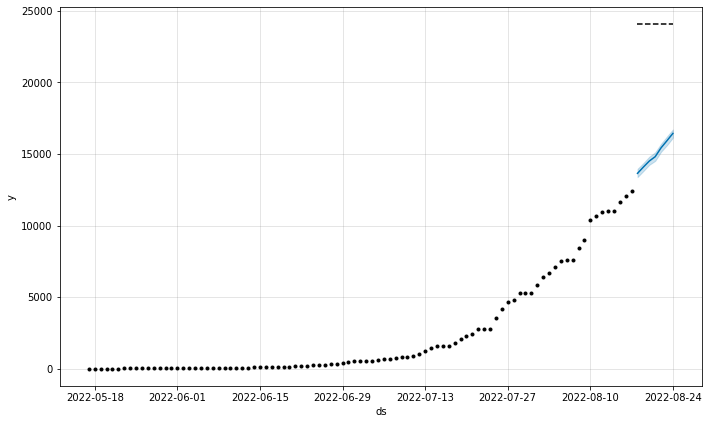

In [ ]:
model.plot(forecast)
#pyplot.show()
pyplot.savefig('/content/drive/MyDrive/monkeypox_pics/forecast_02.png')

In [ ]:
df

,ds,y
0,2022-05-17,1
1,2022-05-18,1
2,2022-05-19,1
3,2022-05-20,2
4,2022-05-21,4
...,...,...
95,2022-08-20,13192
96,2022-08-21,13232
97,2022-08-22,13908
98,2022-08-23,14564


In [ ]:
actural = df[df['ds']>'2022-08-17']
actural = actural[actural['ds']<'2022-08-25']
actural = actural['y'].values
pred = forecast[forecast['ds']<'2022-08-25']
pred

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,...,playoff,playoff_lower,playoff_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-08-18,13566.163572,24074.0,13385.785841,13962.688479,13566.163319,13566.163595,82.056266,82.056266,82.056266,...,0.000000,0.000000,0.000000,82.056266,82.056266,82.056266,0.0,0.0,0.0,13648.219838
1,2022-08-19,14059.358755,24074.0,13811.167503,14368.038465,14059.355225,14059.361245,30.089613,30.089613,30.089613,...,-66.144675,-66.144675,-66.144675,96.234288,96.234288,96.234288,0.0,0.0,0.0,14089.448368
2,2022-08-20,14545.664004,24074.0,14244.294597,14810.840995,14545.656076,14545.672022,-37.162937,-37.162937,-37.162937,...,-13.759237,-13.759237,-13.759237,-23.403701,-23.403701,-23.403701,0.0,0.0,0.0,14508.501066
3,2022-08-21,15023.556064,24074.0,14520.224555,15121.813420,15023.542845,15023.571061,-210.197711,-210.197711,-210.197711,...,-66.144675,-66.144675,-66.144675,-144.053036,-144.053036,-144.053036,0.0,0.0,0.0,14813.358353
4,2022-08-22,15491.621719,24074.0,15159.833514,15720.217479,15491.601675,15491.644379,-55.976600,-55.976600,-55.976600,...,-13.759237,-13.759237,-13.759237,-42.217363,-42.217363,-42.217363,0.0,0.0,0.0,15435.645120
5,2022-08-23,15948.572560,24074.0,15617.262661,16225.155044,15948.544955,15948.602955,-16.241564,-16.241564,-16.241564,...,0.000000,0.000000,0.000000,-16.241564,-16.241564,-16.241564,0.0,0.0,0.0,15932.330997
6,2022-08-24,16393.256516,24074.0,16137.678604,16718.879777,16393.221358,16393.294351,47.625108,47.625108,47.625108,...,0.000000,0.000000,0.000000,47.625108,47.625108,47.625108,0.0,0.0,0.0,16440.881624


(7,)
(7,)
MAE: 1340.484
MAPE: 0.098


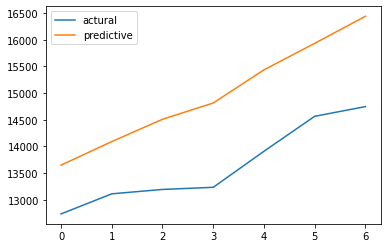

In [ ]:
pred = pred['yhat'].values
print(actural.shape)
print(pred.shape)
mae = mean_absolute_error(actural, pred)
mape = mean_absolute_percentage_error(actural, pred)
print('MAE: %.3f' % mae)
print('MAPE: %.3f' % mape)
pyplot.plot(actural, label = 'actural')
pyplot.plot(pred, label = 'predictive')
pyplot.legend()
pyplot.savefig('/content/drive/MyDrive/monkeypox_pics/accuracy.png')

In [ ]:
error = actural-pred
error_per_day = DataFrame()
error_per_day.insert(0,'Date', forecast['ds'])
error_per_day.insert(1, 'Actural', actural)
error_per_day.insert(2, 'Pred', pred)
error_per_day.insert(3, 'Error', error)
error_per_day

,Date,Actural,Pred,Error
0,2022-08-18,12733,13648.219838,-915.219838
1,2022-08-19,13110,14089.448368,-979.448368
2,2022-08-20,13192,14508.501066,-1316.501066
3,2022-08-21,13232,14813.358353,-1581.358353
4,2022-08-22,13908,15435.645120,-1527.645120
5,2022-08-23,14564,15932.330997,-1368.330997
6,2022-08-24,14746,16440.881624,-1694.881624


In [ ]:
error_per_day.to_csv('/content/drive/MyDrive/monkeypox_table/err.csv')